## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
import random
warnings.filterwarnings('ignore')
# get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
np.random.seed(1)

In [3]:
df = pd.read_csv("./intrusion_detection/data.csv")

In [4]:
df.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


In [5]:
df.describe()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,24998.000000,24998.000000,2.499800e+04,2.499800e+04,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,...,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000
mean,310.648452,32.024842,2.442409e+04,3.305597e+03,0.193535,0.001200,0.229418,0.251700,0.014841,0.004360,...,182.405832,115.254580,0.520648,0.083117,0.148392,0.032109,0.284272,0.278418,0.118272,0.119189
std,2712.235502,16.493033,2.420103e+06,8.301712e+04,2.127846,0.045594,10.457662,11.545358,0.531652,0.098905,...,99.046209,110.659088,0.449020,0.188442,0.309335,0.111102,0.444531,0.445374,0.306349,0.317858
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,62.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,50.000000,2.790000e+02,5.310000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,70.000000,3.817091e+08,5.150836e+06,77.000000,4.000000,884.000000,975.000000,40.000000,8.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preprocessing data

In [6]:
class preProcessor:
    def __init__(self):
        self.scalar = StandardScaler()
    def fit(self, df, features):
        # Separating out the features
        x = df[features]
        self.scalar = StandardScaler().fit(x)
    def transform(self, df, features):
        rest = [col for col in df.columns.values if col not in features]
        res = pd.DataFrame(self.scalar.transform(df), columns=features)
#         print(res)
        res[rest] = df[rest]
        return res

In [7]:
target = 'xAttack'
features = df.columns.values[[df.columns.values != 'xAttack']]
features

array(['duration', 'service', 'src_bytes', 'dst_bytes', 'hot',
       'num_failed_logins', 'num_compromised', 'num_root',
       'num_file_creations', 'num_access_files', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'], dtype=object)

In [8]:
processor = preProcessor()

In [9]:
processor.fit(df[features], features)

In [10]:
df_standard = processor.transform(df[features], features)

In [11]:
df_standard.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.114538,-0.425936,-0.010013,-0.034507,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-1.690213,1.262872,1.067572,-0.441083,-0.253425,0.071030,-0.639500,-0.535332,-0.386077,-0.374982
1,-0.114538,0.362291,-0.010092,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,0.732947,-1.032512,-1.159545,-0.069609,-0.479722,-0.289006,-0.639500,-0.625146,2.878240,2.771138
2,-0.114538,-0.425936,-0.010023,0.077316,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-1.447897,1.262872,1.067572,-0.441083,-0.382738,0.251048,-0.639500,-0.625146,-0.386077,-0.374982
3,-0.114538,-0.729101,-0.009539,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-0.488729,-0.761404,-0.647308,-0.228812,0.263823,-0.289006,-0.594507,-0.625146,-0.386077,-0.374982
4,-0.114538,0.301658,-0.010092,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,0.732947,-0.815626,-0.936833,-0.175745,-0.479722,-0.289006,1.610108,1.620205,-0.386077,-0.374982


In [12]:
df_standard[target] = df[target]

In [13]:
df_standard.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,-0.114538,-0.425936,-0.010013,-0.034507,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,1.262872,1.067572,-0.441083,-0.253425,0.071030,-0.639500,-0.535332,-0.386077,-0.374982,normal
1,-0.114538,0.362291,-0.010092,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-1.032512,-1.159545,-0.069609,-0.479722,-0.289006,-0.639500,-0.625146,2.878240,2.771138,dos
2,-0.114538,-0.425936,-0.010023,0.077316,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,1.262872,1.067572,-0.441083,-0.382738,0.251048,-0.639500,-0.625146,-0.386077,-0.374982,normal
3,-0.114538,-0.729101,-0.009539,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-0.761404,-0.647308,-0.228812,0.263823,-0.289006,-0.594507,-0.625146,-0.386077,-0.374982,normal
4,-0.114538,0.301658,-0.010092,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-0.815626,-0.936833,-0.175745,-0.479722,-0.289006,1.610108,1.620205,-0.386077,-0.374982,dos


# Question 1

## PART-1 My PCA

In [14]:
class MyPCA:
    def __init__(self, n_components = None):
        self.n_components = n_components
    def fit(self, df):
        margin = 10
        self.cols = df.columns.values
        x = df.values
        covar = np.dot(x.T,x)
        self.u, self.s, self.vh = np.linalg.svd(x, full_matrices=False)
        if(self.n_components is None):
            k = len(self.s)
        else:
            k = self.n_components
        cum_sum = 0.0
        tot_sum = np.sum(np.square(self.s))
        for i in range(len(self.s)):
            cum_sum += self.s[i]**2
            if(cum_sum/tot_sum*100 >= 90):
                self.n_components = i + 1
                break
        self.V = self.vh.T[:,:self.n_components]
    def transform(self, df):
        new_cols = ['PCA_']*len(self.V[0])
        for i in range(len(new_cols)):
            new_cols[i] = new_cols[i] + str(i+1)
        return pd.DataFrame(np.dot(df,self.V),columns=new_cols)

In [15]:
myPCA = MyPCA()

In [16]:
myPCA.fit(df_standard[features])

In [17]:
np.cumsum((np.square(myPCA.s)))/np.sum((np.square(myPCA.s)))

array([0.23233278, 0.40004825, 0.49014959, 0.55525906, 0.60602914,
       0.65238779, 0.69158857, 0.72800063, 0.76269096, 0.79709466,
       0.83029625, 0.86198573, 0.88670879, 0.90931903, 0.92645134,
       0.94188281, 0.95609327, 0.96995871, 0.98186236, 0.98911049,
       0.9924583 , 0.99475072, 0.99655022, 0.99791726, 0.99891386,
       0.99947831, 0.99980557, 0.99996538, 1.        ])

In [18]:
df_standard.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,-0.114538,-0.425936,-0.010013,-0.034507,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,1.262872,1.067572,-0.441083,-0.253425,0.071030,-0.639500,-0.535332,-0.386077,-0.374982,normal
1,-0.114538,0.362291,-0.010092,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-1.032512,-1.159545,-0.069609,-0.479722,-0.289006,-0.639500,-0.625146,2.878240,2.771138,dos
2,-0.114538,-0.425936,-0.010023,0.077316,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,1.262872,1.067572,-0.441083,-0.382738,0.251048,-0.639500,-0.625146,-0.386077,-0.374982,normal
3,-0.114538,-0.729101,-0.009539,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-0.761404,-0.647308,-0.228812,0.263823,-0.289006,-0.594507,-0.625146,-0.386077,-0.374982,normal
4,-0.114538,0.301658,-0.010092,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-0.815626,-0.936833,-0.175745,-0.479722,-0.289006,1.610108,1.620205,-0.386077,-0.374982,dos


In [19]:
df_transformed = myPCA.transform(df_standard[features])

In [20]:
df_transformed.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14
0,2.509465,0.952118,-0.080576,0.089474,-0.465568,0.264136,-0.073176,-0.122968,0.115930,-0.037055,-0.015486,-0.085031,-0.478762,0.380058
1,-1.193260,-5.598204,-0.270796,1.130964,-0.813104,1.629214,0.541853,0.190286,-0.243678,0.079392,0.028094,-0.064368,0.430118,0.264015
2,2.447100,0.908940,-0.060319,0.031070,-0.822739,0.170783,-0.098461,-0.161767,0.088160,0.084798,0.005995,-0.050482,-0.754361,0.429615
3,1.111758,0.343094,0.004162,-0.266452,-0.166214,-0.596465,-0.015911,0.026994,-0.161913,0.061836,0.050151,0.362929,-0.542295,0.408404
4,-3.983967,1.268863,-0.050828,0.252378,0.537147,0.561608,0.278506,0.038172,-0.012687,0.004357,-0.013467,-0.041691,0.072667,-0.071333


### Observations:
1. 14 Eigen Values correspond to 90% of the variance, i.e, 10% tolerance 

## Sklearn PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
pca.fit(df_standard[features])

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
res = pd.DataFrame(pca.transform(df_standard[features]))
res.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.509465,-0.952118,-0.080576,0.089474,-0.465568,-0.264136,-0.073176,0.122968,0.115930,-0.037055,0.015486,0.085031,0.478762,-0.380058
1,1.193260,5.598204,-0.270796,1.130964,-0.813104,-1.629214,0.541853,-0.190286,-0.243678,0.079392,-0.028094,0.064368,-0.430118,-0.264015
2,-2.447100,-0.908940,-0.060319,0.031070,-0.822739,-0.170783,-0.098461,0.161767,0.088160,0.084798,-0.005995,0.050482,0.754361,-0.429615
3,-1.111758,-0.343094,0.004162,-0.266452,-0.166214,0.596465,-0.015911,-0.026994,-0.161913,0.061836,-0.050151,-0.362929,0.542295,-0.408404
4,3.983967,-1.268863,-0.050828,0.252378,0.537147,-0.561608,0.278506,-0.038172,-0.012687,0.004357,0.013467,0.041691,-0.072667,0.071333


In [23]:
print(pca.explained_variance_ratio_)  

[0.23233278 0.16771547 0.09010134 0.06510947 0.05077007 0.04635866
 0.03920077 0.03641207 0.03469033 0.03440369 0.03320159 0.03168948
 0.02472306 0.02261023]


In [24]:
np.sum(pca.explained_variance_ratio_)

0.9093190252147921

In [25]:
### Function for Test Train split
def splitData(X ,Y, test_size = 0.2, random_state = 10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size ,random_state = random_state)
    return (X_train, X_test, y_train, y_test)

### Spltting Data

In [26]:
X_train, X_val, y_train, y_val = splitData(df_transformed, df[target])

In [27]:
X_train = df_transformed
y_train = df[target]

## Util Functions

In [28]:
def calcPurity(n_clusters, y_pred , y):
    labels_ = {}
    y_pred = np.array(y_pred)
    y = np.array(y)
    for i in range(n_clusters):
        lst = list(y[y_pred == i])
        labels_[i]  = max(set(lst), key=lst.count)
    purity = {}
    for i in range(n_clusters):
        temp = y_pred[y_pred == i]
        temp = np.array([labels_[i] for i in temp])
        y1 = y[y_pred == i]
        purity[i] = len(temp[temp == y1])/len(temp)
    return (labels_, purity)

## PART - 2 My K-Means

In [29]:
class MyKmeans():
    def __init__(self, n_clusters = 3, random_state = 0, max_iter=300, tol=0.0001):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.max_iter = max_iter
        self.tol = tol
    
    def fit(self, df, y):
        np_df = df.values
        y = y.values
        self.cols = df.columns.values
        self.centers = {}
        temp = random.sample(range(df.shape[0]),self.n_clusters)
        for i in range(len(temp)):
            self.centers[i] = np_df[temp[i]]
        for i in range(self.max_iter):
            self.classes = {}
            self.indexes = {}
            prev_centers = dict(self.centers)
            for t in range(self.n_clusters):
                self.classes[t] = []
                self.indexes[t] = []
            start = 0
            for row in np_df:
                dists = [np.linalg.norm(row-self.centers[c]) for c in self.centers]
                index = dists.index(min(dists))
                self.classes[index].append(row)
                self.indexes[index].append(start)
                start += 1
            for t in range(len(self.centers)):
                self.centers[t] = np.average(self.classes[t], axis = 0)
            flag = True
            error = 0.00
            for t in range(len(self.centers)):
                e = np.linalg.norm(prev_centers[t]-self.centers[t])
                error += e
                if(e > self.tol):
                    flag = False
            print("Iteration: {0}".format(i))
            print("Error: {0}".format(float(error)))
            if(flag):
                break
        self.labels_ = {}
        for t in range(self.n_clusters):
            lst = list(y[self.indexes[t]])
            self.labels_[t] = max(set(lst), key=lst.count)
        self.purity = {}
        for t in range(self.n_clusters):
            self.purity[t] = len(y[self.indexes[t]][y[self.indexes[t]] == self.labels_[t]])/len(self.classes[t])
    
    def predict_row(self, row):
        dists = [np.linalg.norm(row-self.centers[c]) for c in self.centers]
        index = dists.index(min(dists))
        return index
        
    def predict(self, df):
        res = []
        for row in df.values:
            res.append(self.predict_row(row))
        return np.array(res)

In [30]:
kmeans = MyKmeans(5, max_iter=200)

In [31]:
kmeans.fit(X_train, y_train)

Iteration: 0
Error: 8.593157962338001
Iteration: 1
Error: 5.238195341864797
Iteration: 2
Error: 2.5874322251436856
Iteration: 3
Error: 1.5865378269235066
Iteration: 4
Error: 0.8561211580097641
Iteration: 5
Error: 0.26836809620921254
Iteration: 6
Error: 0.058260000375898124
Iteration: 7
Error: 0.0046401395723837426
Iteration: 8
Error: 0.0030050654731510933
Iteration: 9
Error: 0.0


In [33]:
kmeans_pred = kmeans.predict(X_train)

In [34]:
kmeans_pred

array([2, 0, 2, ..., 2, 3, 1])

In [35]:
kmeans.labels_

{0: 'dos', 1: 'dos', 2: 'normal', 3: 'normal', 4: 'normal'}

In [36]:
print("KMeans Purity:")
calcPurity(5, kmeans_pred, y_train)

KMeans Purity:


({0: 'dos', 1: 'dos', 2: 'normal', 3: 'normal', 4: 'normal'},
 {0: 0.4623728813559322,
  1: 0.9839525805985254,
  2: 0.9193050533556751,
  3: 0.5297587131367292,
  4: 0.7244421380384016})

## Sklearn K means

In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [38]:
sk_kmeans_pred = kmeans1.predict(X_train)

In [39]:
calcPurity(5, sk_kmeans_pred, y_train)

({0: 'probe', 1: 'normal', 2: 'dos', 3: 'dos', 4: 'normal'},
 {0: 0.8070866141732284,
  1: 0.8974595515185921,
  2: 0.9838126896950427,
  3: 0.4603442456969288,
  4: 1.0})

## PART - 3 GMM

In [40]:
from scipy.misc import imread, imshow
from sklearn import mixture
gmm = mixture.GaussianMixture(covariance_type='full', n_components=5)
gmm.fit(X_train)
gmm_pred = gmm.predict(X_train)

In [41]:
print(gmm_pred)

[4 0 4 ... 3 4 1]


In [42]:
calcPurity(5, gmm_pred, y_train)

({0: 'normal', 1: 'dos', 2: 'normal', 3: 'normal', 4: 'normal'},
 {0: 0.49483985765124555,
  1: 1.0,
  2: 1.0,
  3: 0.4834193072955048,
  4: 0.8628218510786361})

## PART - 4 Hierarchical clustering with single-linkage and five clusters.

In [43]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
hclust_pred = cluster.fit_predict(X_train)  

In [44]:
calcPurity(5, hclust_pred, y_train)

({0: 'normal', 1: 'probe', 2: 'r2l', 3: 'normal', 4: 'normal'},
 {0: 0.5346352395053824, 1: 1.0, 2: 0.6666666666666666, 3: 1.0, 4: 1.0})

## Bar Charts

In [45]:
cluster_types = {"kmeans" : kmeans_pred, "gmm" : gmm_pred, "hclust" : hclust_pred}

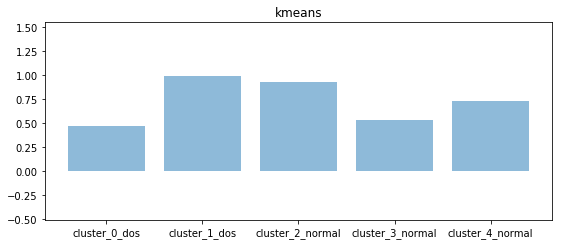

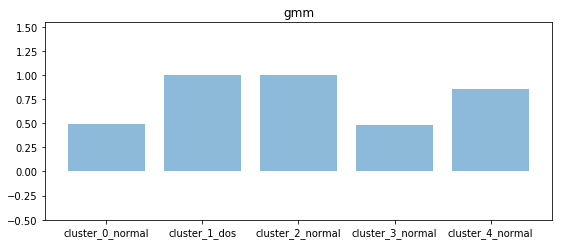

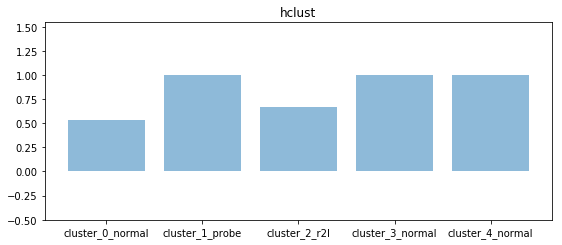

In [48]:
plot_index = 0
for cluster_type, y_pred in cluster_types.items():
    labels, purity = calcPurity(5, y_pred, y_train)
    labels = ["cluster_" + str(k) + "_" + val for k, val in labels.items()]
    sizes = [val for k, val in purity.items()]
    # print(sizes) # adds up to 1433, which is the total number of participants
    ax1 = plt.subplot(2,2,plot_index+1)
    ax1.figure.set_size_inches(20, 8)
#     ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.bar(labels, sizes, align='center', alpha=0.5)
    ax1.axis('equal')
    ax1.set_title(str(cluster_type))
    plot_index += 1
    plt.show()

## Part 5
Yes, PCA can be used with categorical variables, but it might/might not be effective based on the type of data.

### Following things can be done for dimentionality reduction with Ordinal/Binary features :
1. Consider ordinal features as numerical features.
2. Use the polychoric correlation matrix (polychoric PCA).
3. use means of a truncated distribution for variable scores.

### PCA for Nominal data:
1. Bucketing data and then applying the above methods
2. Encoding the data into distinct numeric values

# Question 2

In [49]:
admission_orig_df = pd.read_csv("AdmissionDataset/data.csv")

In [50]:
admission_orig_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [51]:
admission_orig_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,247.726667,316.542222,107.162222,3.126667,3.361111,3.468889,8.577600,0.553333,0.720889
std,144.927656,11.335705,6.023554,1.140254,0.993374,0.919432,0.599454,0.497701,0.141398
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.000000,0.340000
25%,124.250000,308.250000,103.000000,2.000000,2.500000,3.000000,8.122500,0.000000,0.630000
50%,246.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,373.750000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [52]:
admission_orig_cols = ['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']
admission_orig_df.columns = admission_orig_cols

## Data Exploration

In [53]:
admission_orig_df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [54]:
admission_orig_df[admission_orig_df['GRE_Score'] != admission_orig_df.GRE_Score.astype(int)]

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit


In [55]:
corr = admission_orig_df.corr()
corr

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No,1.000000,-0.080196,-0.115323,-0.027499,-0.108152,0.010717,-0.061309,0.010068,0.023551
GRE_Score,-0.080196,1.000000,0.821423,0.631178,0.616670,0.535315,0.826544,0.562533,0.810894
TOEFL_Score,-0.115323,0.821423,1.000000,0.642612,0.648256,0.544411,0.810381,0.471452,0.790005
University_Rating,-0.027499,0.631178,0.642612,1.000000,0.722434,0.614527,0.696721,0.437424,0.685563
SOP,-0.108152,0.616670,0.648256,0.722434,1.000000,0.664015,0.713633,0.403552,0.681585
LOR,0.010717,0.535315,0.544411,0.614527,0.664015,1.000000,0.640347,0.392998,0.644693
CGPA,-0.061309,0.826544,0.810381,0.696721,0.713633,0.640347,1.000000,0.507005,0.877802
Research,0.010068,0.562533,0.471452,0.437424,0.403552,0.392998,0.507005,1.000000,0.557906
Chance_of_Admit,0.023551,0.810894,0.790005,0.685563,0.681585,0.644693,0.877802,0.557906,1.000000


In [56]:
# Dropping Serial Number
admission_df = admission_orig_df.drop(columns=['Serial_No'])

In [57]:
corr = admission_df.corr()
corr

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.821423,0.631178,0.616670,0.535315,0.826544,0.562533,0.810894
TOEFL_Score,0.821423,1.000000,0.642612,0.648256,0.544411,0.810381,0.471452,0.790005
University_Rating,0.631178,0.642612,1.000000,0.722434,0.614527,0.696721,0.437424,0.685563
SOP,0.616670,0.648256,0.722434,1.000000,0.664015,0.713633,0.403552,0.681585
LOR,0.535315,0.544411,0.614527,0.664015,1.000000,0.640347,0.392998,0.644693
CGPA,0.826544,0.810381,0.696721,0.713633,0.640347,1.000000,0.507005,0.877802
Research,0.562533,0.471452,0.437424,0.403552,0.392998,0.507005,1.000000,0.557906
Chance_of_Admit,0.810894,0.790005,0.685563,0.681585,0.644693,0.877802,0.557906,1.000000


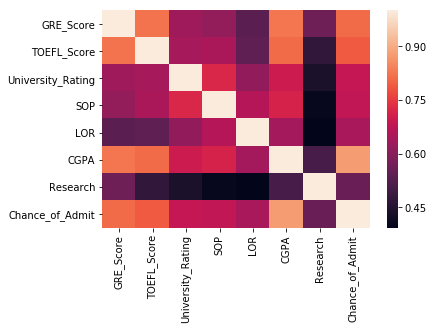

In [58]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [59]:
#admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'] = (admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'] - admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'].mean())/admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'].std()
# admission_df = (admission_df - admission_df.mean())/admission_df.std()

In [60]:
admission_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,316.542222,107.162222,3.126667,3.361111,3.468889,8.577600,0.553333,0.720889
std,11.335705,6.023554,1.140254,0.993374,0.919432,0.599454,0.497701,0.141398
min,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.000000,0.340000
25%,308.250000,103.000000,2.000000,2.500000,3.000000,8.122500,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Splitting data into train(80%) and validation(20%)

In [61]:
admission_train_X, admission_val_X, admission_train_Y, admission_val_Y = splitData(admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'], admission_df['Chance_of_Admit'], test_size=0.2)

# Util Functions

#### Euclidean distance

In [62]:
def euclidean(row1, row2):
    if(len(row1) != len(row2)):
        raise ValueError('row lengths do not match in euclidean dist calculation!')
    return np.sqrt(np.sum([(x-y)**2 for x, y in zip(row1,row2)]))

def chebyshev(row1, row2):
    if(len(row1) != len(row2)):
        raise ValueError('row lengths do not match in chebyshev dist calculation!')
    return np.max([abs(x-y) for x, y in zip(row1,row2)])

def manhattan(row1, row2):
    if(len(row1) != len(row2)):
        raise ValueError('row lengths do not match in manhattan dist calculation!')
    return np.sum([abs(x-y) for x, y in zip(row1,row2)])

def minkowski(row1, row2):
    if(len(row1) != len(row2)):
        raise ValueError('row lengths do not match in minkowski dist calculation!')
    x = np.cbrt(np.sum([abs(x-y)**3 for x, y in zip(row1,row2)]))
#     print(x)
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def printRegressionErrors(y, y_pred):
    mse = metrics.mean_squared_error(sigmoid(admission_val_Y), y_pred)  
    mae = metrics.mean_absolute_error(sigmoid(admission_val_Y), y_pred)
    mape = mean_absolute_percentage_error(sigmoid(admission_val_Y), y_pred)
    print("MSE : {0}".format(mse))
    print("MAE : {0}".format(mae))
    print("MAPE : {0}".format(mape))
    
def makeCoeffDF(coeffs):
    coeff_cols = ['GRE_Score', 'TOEFL_Score', 
                  'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Intercept']
    coeff_df = pd.DataFrame(coeffs, columns=coeff_cols)
    return coeff_df

In [63]:
def print_metrics(Y_predict, Y_test):
    accuracy = metrics.accuracy_score(Y_test, Y_predict)
    precision = metrics.precision_score(Y_test, Y_predict, pos_label=1, average='macro')
    recall = metrics.recall_score(Y_test, Y_predict,pos_label=1, average='macro')
    f1_score = metrics.f1_score(Y_test, Y_predict,pos_label=1, average='macro')
    print("Accuracy : " +str(accuracy))
    print("Precision : " +str(precision))
    print("recall : " +str(recall))
    print("f1 Score : " +str(f1_score))
    print()

In [64]:
def calc_metrics(Y_predict, Y_test):
    accuracy = metrics.accuracy_score(Y_test, Y_predict)
    precision = metrics.precision_score(Y_test, Y_predict, pos_label=1, average='macro')
    recall = metrics.recall_score(Y_test, Y_predict,pos_label=1, average='macro')
    f1_score = metrics.f1_score(Y_test, Y_predict,pos_label=1, average='macro')
    return [accuracy, precision, recall, f1_score]

In [65]:
# Calculating metrics for all datasets
def evaluate_metric_dataframe(datasets1, model):
    metric_cols = ['DataSet', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    metric_df = pd.DataFrame(columns = metric_cols)
    for data in datasets1:
        model.fit(data[1], data[2])
        pred_Y = model.predict(data[3])
        scores = calc_metrics(pred_Y, data[4])
        metric_df = metric_df.append(pd.DataFrame([[data[0]] + scores], columns=metric_cols),ignore_index=True)
    return metric_df

# My KNN

In [66]:
class KNN:
    def __init__(self, n_neighbors=5, metric=euclidean):
        self.n_neighbors = n_neighbors
        self.metric = metric
        
    def fit(self, X, Y):
        self.scaler = MinMaxScaler()
        self.scaler = self.scaler.fit(X)
        self.train_X = pd.DataFrame(self.scaler.transform(X), columns=X.columns)
#         self.train_X = X
        self.train_Y = Y

    def scalerFit(self, df):
        scaler = MinMaxScaler()
        scaler.fit(df)
        return scaler

    def transform(self, scalar, df, cols):
        df_scaled = pd.DataFrame(scaler.transform(df[cols]), columns=cols)
        return df_scaled

    def predict_row(self, row):
        dists = []
        index = 0
        for i, train_row in self.train_X.iterrows():
            dist = self.metric(row, train_row)
            label = self.train_Y.iloc[index]
            dists.append((dist,label))
            index += 1
        dists.sort()
        dists = dists[:self.n_neighbors]
        elem,count = np.unique([j for (i,j) in dists], return_counts=True)
        return elem[np.argmax(count)]
    
    def predict(self, X):
        X = pd.DataFrame(self.scaler.transform(X), columns=X.columns)
        y = []
        for index, row in X.iterrows():
            y.append(self.predict_row(row))
        return y

## PART - 1 Logistic Regression

In [67]:
admission_df_log = admission_df.copy()

In [68]:
admission_df_log.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


In [69]:
admission_df_log['Chance_of_Admit'] = [1 if x >= 0.5 else 0 for x in admission_df['Chance_of_Admit']]

In [70]:
admission_df_log.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,316.542222,107.162222,3.126667,3.361111,3.468889,8.577600,0.553333,0.922222
std,11.335705,6.023554,1.140254,0.993374,0.919432,0.599454,0.497701,0.268120
min,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.000000,0.000000
25%,308.250000,103.000000,2.000000,2.500000,3.000000,8.122500,0.000000,1.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


In [71]:
admission_train_X, admission_val_X, admission_train_Y, admission_val_Y = splitData(admission_df_log.iloc[:,admission_df_log.columns != 'Chance_of_Admit'], admission_df_log['Chance_of_Admit'], test_size=0.2)

In [83]:
class MyLogisticRegresson:
    def __init__(self, learning_rate = 0.01, no_iterations = 1000 ,threshold = 0.5):
        self.alpha = learning_rate
        self.iterations = no_iterations
        self.threshold = threshold
    
    def normalize_X(self, X):
        X_normalized = (X - self.X_mean)/self.X_var
        return X_normalized

    def normalize_Y(self, Y):
#         return X
        Y_normalized = (Y - self.Y_mean)/self.Y_var
        return Y_normalized
    
    def fit(self, X, Y):
        #### m = no of examples, n = no of features
        ### X : shape = mxn
        ### Y : shape = 1xm
        self.X_mean = X.mean()
#         print("mean: {0}",self.X_mean)
        self.X_var = X.std()
        self.Y_mean = Y.mean()
        self.Y_var = Y.std()
        
        X  = self.normalize_X(X)
#         Y  = self.normalize_Y(Y)
        c = np.ones((1, len(X)))  ### shape = 1xm
        X_temp = np.concatenate((X, c.T), axis=1) ## Shape : mxn
        theta = np.zeros((1, len(X_temp[0]))) ## shape: 1 X n 
        Y_temp = Y.values.reshape(len(X),1)  ## shape : (m,1)
#         print(X_temp)
#         print("X : {0}, theta : {1}, Y : {2}".format(X_temp.shape, theta.shape, Y_temp.shape))
        theta, cost_hist = self.gradient_descent(theta, X_temp, Y_temp, self.alpha, self.iterations)
        self.theta = theta
        self.coef_ = theta.flatten()[:-1]
        self.cost_hist = cost_hist
        self.intercept_ = theta.flatten()[-1:]
#         print(theta)
    
    def predict_probs(self, X):
        X = self.normalize_X(X)
        c = np.ones((1, len(X)))  ### shape = 1xm
        X_temp = np.concatenate((X, c.T), axis=1) ## Shape : kxn
        y_pred = np.dot(X_temp,self.theta.T)
        return sigmoid(y_pred.flatten())
    
    def predict(self, X):
        y_probs = self.predict_probs(X)
        y_probs[y_probs >= self.threshold] = 1
        y_probs[y_probs < self.threshold] = 0
        return y_probs
    
    def allCoeffs(self):
        coeffs = list(self.coef_) + list(self.intercept_)
        coeffs = np.array(coeffs).reshape(1, len(coeffs))
        return coeffs
    
    def __loss(self, Y, h):
        h1 = h.copy()
        h1[h1 == 0] = 1
        h2 = h.copy()
        h2[h2 == 1] = 0
        return np.mean(-Y * np.log(h1) - (1 - Y) * np.log(1 - h2))
        
    def gradient_descent(self, theta, X, Y, alpha, iterations):
        cost_history = [0] * iterations
        m = len(Y)

        for iteration in range(iterations):
            # Hypothesis Values
#             print(theta)
#             print(X.shape, theta.T.shape)
            zz = np.dot(X,theta.T)
#             print(zz)
            h = sigmoid(zz) ## shape : (m,1)
            
            loss = h - Y ## shape: (m,1)
#             print("loss: {0}".format(loss.shape))
#             print("loss : {0}".format(np.sum(loss)))
            # Gradient Calculation
            gradient = np.dot(X.T,loss) / m   ##shape : (n,1)
#             print("grad: {0}".format(gradient.shape))
            # Changing Values of B using Gradient
            theta = theta - alpha * (gradient.T)
#             print(theta.shape)
            # New Cost Value
            cost = self.__loss(Y, h)
            cost_history[iteration] = cost
#             print("i: {0}".format(iteration), sep=" ")
#             print("theta: {0}".format(theta), sep= " ")
#             print("cost: {0}".format(cost))
#             print(cost, theta)
        
#         ax = plt.subplot(1,1,1)
#         ax.plot(range(iterations), cost_history)
#         ax.set_xlabel('iteration')
#         ax.set_ylabel('cost')
#         plt.show()

        return theta, cost_history

In [84]:
threshold = 0.5
lr = MyLogisticRegresson(0.01, 10000)
lr.fit(admission_train_X,admission_train_Y)

In [85]:
y_pred = lr.predict(admission_val_X)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [86]:
makeCoeffDF(lr.allCoeffs())

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.441141,0.754185,-0.255086,-0.467181,0.481577,1.356643,0.045651,3.947705


In [87]:
metrics.accuracy_score(admission_val_Y, y_pred)

0.9555555555555556

## sklearn Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(admission_train_X, admission_train_Y)
y_pred = clf.predict(admission_val_X)
print(y_pred)
print(clf.coef_)
print(clf.intercept_)
metrics.accuracy_score(admission_val_Y, y_pred)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[-0.08908858  0.11668916  0.05232433 -0.2544266   0.75885504  2.04799802
   0.6798165 ]]
[-0.61218553]


0.8888888888888888

### My KNN

In [89]:
admission_train_X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
66,327,111,4,3.0,4.0,8.40,1
309,320,110,5,5.0,4.5,9.22,1
312,320,112,2,3.5,3.5,8.78,1
12,309,105,4,3.5,2.0,8.18,0
219,338,118,4,3.0,4.5,9.40,1


In [90]:
myKNN = KNN(n_neighbors=5, metric=euclidean)
myKNN.fit(admission_train_X, admission_train_Y)

In [91]:
y_pred = myKNN.predict(admission_val_X)

In [92]:
metrics.accuracy_score(admission_val_Y, y_pred)

0.9111111111111111

## Observations:
1. Accuracy of the Logistic regression on the validation dataset is ~95% and the same for KNN is 91%

## PART - 3

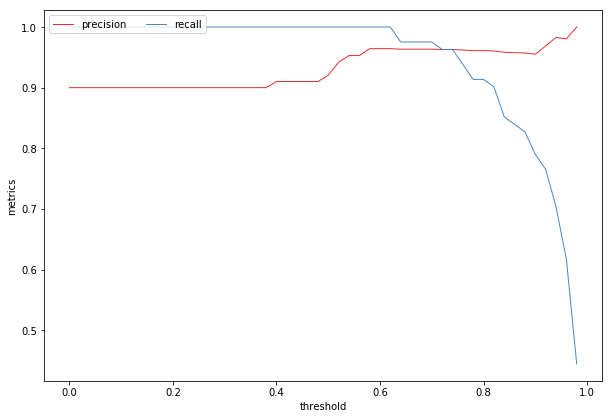

In [116]:
precisions = []
recalls = []
f1_fin = 0
f1_index = 0
thresholds = [i/50 for i in range(0,50)]
for threshold in thresholds:
    lr = MyLogisticRegresson(0.1, 500, threshold)
    lr.fit(admission_train_X,admission_train_Y)  
    y_pred = lr.predict(admission_val_X)
    precisions.append(metrics.precision_score(y_pred=y_pred, y_true=admission_val_Y))
    recalls.append(metrics.recall_score(y_pred=y_pred, y_true=admission_val_Y))
    f1 = metrics.f1_score(y_pred, admission_val_Y)
    if(f1 > f1_fin):
        f1_index = threshold
        f1_fin = f1
    
ax = plt.subplot(2, 1, 1)
# plt.style.use('seaborn-darkgrid')
ax.figure.set_size_inches(10,15)

# create a color palette
palette = plt.get_cmap('Set1')
ax.plot(thresholds, precisions, marker='', color=palette(0), linewidth=1, alpha=0.9, label='precision')
ax.plot(thresholds, recalls, marker='', color=palette(1), linewidth=1, alpha=0.9, label='recall')

# Add legend
ax.legend(loc=2, ncol=2)

# Add titles
# ax.set_title("Precision and Recall variation", loc='left', fontsize=12, fontweight=0, color='orange')
ax.set_xlabel('threshold')
ax.set_ylabel('metrics')
plt.show()

In [117]:
f1_index

0.58

## Observations:
1. The best threshold would be where the F1 score is maximum, i.e 0.58 in this case, as we want both the precision as well as the recall to be good.

# Question - 3

## Reading Input Data

In [95]:
wine_df_orig = pd.read_csv("./wine-quality/data_changed.csv", header=None)

In [96]:
wine_df_orig.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,9.2,0.25,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7
1,6.6,0.20,0.27,10.90,0.038,29.0,130.0,0.99496,3.11,0.44,10.5,7
2,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6
3,7.2,0.23,0.39,14.20,0.058,49.0,192.0,0.99790,2.98,0.48,9.0,7
4,7.6,0.35,0.47,13.30,0.037,42.0,116.0,0.99822,3.04,0.50,9.2,5


In [97]:
wine_df_orig.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.852189,0.278565,0.333786,6.355377,0.045758,35.307849,138.007827,0.994001,3.187675,0.488185,10.513036,5.873866
std,0.838939,0.100747,0.121491,4.981474,0.022044,17.024667,41.854932,0.002909,0.150323,0.113913,1.226730,0.882972
min,3.900000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.800000,0.050000,46.000000,167.000000,0.996040,3.280000,0.542500,11.400000,6.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.810000,1.080000,14.200000,9.000000


In [98]:
df_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [99]:
wine_df_orig.columns = df_cols

In [100]:
wine_df_orig.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,9.2,0.25,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7
1,6.6,0.20,0.27,10.90,0.038,29.0,130.0,0.99496,3.11,0.44,10.5,7
2,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6
3,7.2,0.23,0.39,14.20,0.058,49.0,192.0,0.99790,2.98,0.48,9.0,7
4,7.6,0.35,0.47,13.30,0.037,42.0,116.0,0.99822,3.04,0.50,9.2,5


In [101]:
wine_df_orig.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.852189,0.278565,0.333786,6.355377,0.045758,35.307849,138.007827,0.994001,3.187675,0.488185,10.513036,5.873866
std,0.838939,0.100747,0.121491,4.981474,0.022044,17.024667,41.854932,0.002909,0.150323,0.113913,1.226730,0.882972
min,3.900000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.800000,0.050000,46.000000,167.000000,0.996040,3.280000,0.542500,11.400000,6.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.810000,1.080000,14.200000,9.000000


In [102]:
wine_df_orig.quality.value_counts()

6    1987
5    1311
7     785
8     153
4     150
3      17
9       5
Name: quality, dtype: int64

## Train - Validation Split

In [103]:
wine_train_X, wine_val_X, wine_train_Y, wine_val_Y = splitData(wine_df_orig.iloc[:,wine_df_orig.columns != 'quality'], wine_df_orig['quality'], test_size=0.2)

In [104]:
wine_train_X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000
mean,6.855062,0.279546,0.334155,6.379594,0.045625,35.309558,138.342881,0.994001,3.188616,0.488213,10.527660
std,0.837837,0.100915,0.121400,4.985762,0.022126,17.018437,42.086619,0.002921,0.151248,0.113141,1.229251
min,3.900000,0.080000,0.000000,0.600000,0.012000,2.000000,10.000000,0.987110,2.720000,0.250000,8.000000
25%,6.300000,0.210000,0.270000,1.712500,0.035000,23.000000,109.000000,0.991700,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.500000,0.993730,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.775000,0.050000,46.000000,167.000000,0.996047,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.810000,1.080000,14.050000


In [105]:
wine_train_Y.value_counts()

6    1608
5    1016
7     641
4     123
8     122
3      12
9       4
Name: quality, dtype: int64

## One vs ALL

In [106]:
y_pred_final = np.array([0 for i in range(len(wine_val_Y))])
y_pred_prob_final = np.array([0.00 for i in range(len(wine_val_Y))])
for class_val in range(3,10):
    print("Running for class: {0}".format(class_val))
    lr = MyLogisticRegresson(0.1, 500)
    y_temp = wine_train_Y.copy()
    y_temp[y_temp != class_val] = 0
    y_temp[y_temp == class_val] = 1
    y_val_temp = wine_val_Y.copy()
    y_val_temp[y_val_temp != class_val] = 0
    y_val_temp[y_val_temp == class_val] = 1
    lr.fit(wine_train_X,y_temp)  
    y_pred = lr.predict_probs(wine_val_X)
    y_pred_bool = np.array(y_pred > y_pred_prob_final)
    y_pred_final[y_pred_bool] = class_val
    y_pred_prob_final[y_pred_bool] = y_pred[y_pred_bool]

Running for class: 3
Running for class: 4
Running for class: 5
Running for class: 6
Running for class: 7
Running for class: 8
Running for class: 9


In [107]:
metrics.accuracy_score(wine_val_Y, y_pred_final)

0.536281179138322

# ONE vs ONE

In [108]:
df = wine_train_X.copy()
df['target'] = wine_train_Y

In [109]:
df_val = wine_val_X.copy()
df_val['target'] = wine_val_Y

In [110]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,target
count,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000
mean,6.855062,0.279546,0.334155,6.379594,0.045625,35.309558,138.342881,0.994001,3.188616,0.488213,10.527660,5.886273
std,0.837837,0.100915,0.121400,4.985762,0.022126,17.018437,42.086619,0.002921,0.151248,0.113141,1.229251,0.880908
min,3.900000,0.080000,0.000000,0.600000,0.012000,2.000000,10.000000,0.987110,2.720000,0.250000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.712500,0.035000,23.000000,109.000000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.500000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.775000,0.050000,46.000000,167.000000,0.996047,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.810000,1.080000,14.050000,9.000000


In [111]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,target
710,6.6,0.28,0.34,0.80,0.037,42.0,119.0,0.98880,3.03,0.37,12.5,6
3128,6.7,0.15,0.32,7.90,0.034,17.0,81.0,0.99512,3.29,0.31,10.0,6
1750,6.7,0.61,0.21,1.65,0.117,40.0,240.0,0.99380,3.11,0.57,9.3,5
73,6.5,0.22,0.28,3.70,0.059,29.0,151.0,0.99177,3.23,0.41,12.1,7
2163,6.9,0.44,0.27,5.00,0.038,33.0,166.0,0.99124,3.20,0.42,12.2,6


In [112]:
from itertools import permutations 

In [113]:
y_pred_counts = np.array([defaultdict(int) for i in range(len(wine_val_Y))])
perm = permutations(list(range(3,10)), 2)
for class_a, class_b in perm:
    if(class_a == class_b):
        continue
    print("Running for classes: {0}, {1}".format(class_a, class_b))

    '''
    Setting up temporary X_train and Y_train
    '''
    df_train = df[(df['target'] == class_a) | (df['target'] == class_b)]
    x_temp = df_train.iloc[:,df_train.columns != 'target'].copy()
    y_temp = df_train.iloc[:,df_train.columns == 'target'].copy()
    y_temp[y_temp != class_a] = 0
    y_temp[y_temp == class_a] = 1

    '''
    Setting up temporary X_val and Y_val
    '''
    df_temp = df_val#[(df_val['target'] == class_a) | (df_val['target'] == class_b)]
    x_val_temp = df_temp.iloc[:,df_temp.columns != 'target'].copy()
    y_val_temp = df_temp.iloc[:,df_temp.columns == 'target'].copy()
    y_val_temp[y_val_temp != class_a] = 0
    y_val_temp[y_val_temp == class_a] = 1

    '''
    Model Training
    '''      
    lr = MyLogisticRegresson(0.1, 500)
    lr.fit(x_temp,y_temp)  
    y_pred = np.array(lr.predict(x_val_temp))
    for i, y in enumerate(y_pred):
        if(int(y) == 1):
            y_pred_counts[i][class_a] += 1
        else:
            y_pred_counts[i][class_b] += 1

y_pred_final = [max(d, key=lambda k: d[k]) if bool(d) == True else None for d in y_pred_counts]

Running for classes: 3, 4
Running for classes: 3, 5
Running for classes: 3, 6
Running for classes: 3, 7
Running for classes: 3, 8
Running for classes: 3, 9
Running for classes: 4, 3
Running for classes: 4, 5
Running for classes: 4, 6
Running for classes: 4, 7
Running for classes: 4, 8
Running for classes: 4, 9
Running for classes: 5, 3
Running for classes: 5, 4
Running for classes: 5, 6
Running for classes: 5, 7
Running for classes: 5, 8
Running for classes: 5, 9
Running for classes: 6, 3
Running for classes: 6, 4
Running for classes: 6, 5
Running for classes: 6, 7
Running for classes: 6, 8
Running for classes: 6, 9
Running for classes: 7, 3
Running for classes: 7, 4
Running for classes: 7, 5
Running for classes: 7, 6
Running for classes: 7, 8
Running for classes: 7, 9
Running for classes: 8, 3
Running for classes: 8, 4
Running for classes: 8, 5
Running for classes: 8, 6
Running for classes: 8, 7
Running for classes: 8, 9
Running for classes: 9, 3
Running for classes: 9, 4
Running for 

In [114]:
metrics.accuracy_score(y_pred_final, wine_val_Y)

0.5396825396825397

## Observations:
1. Both One Vs One and One vs All give accuracy of about ~53%